# Chapter 12: Bamboozled by box (and whiskers) plots

For additional context see chapter 11 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

In [10]:
# Dataset URL
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-vienna-general-dublin-maternity-death-to-birth-ratios-data.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()

# Drop 'Note' column
df = df.drop(columns='Note')
# Make 'Year' column dtype string
df['Year'] = df['Year'].astype('string')

# Show head of df
df.head()

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio
0,Vienna General Hospital,1784,284,6,2.1
1,Vienna General Hospital,1785,899,13,1.4
2,Vienna General Hospital,1786,1151,5,0.4
3,Vienna General Hospital,1787,1407,5,0.4
4,Vienna General Hospital,1788,1425,5,0.4


## Split dataframe by hospital

In [11]:
# Split dataframe into two dataframes: Vienna General (VG_df) and Dublin General (DF_df)
grouped_df = df.groupby('Hospital')
# Create dataframe of only Vienna General data
vg_df = grouped_df.get_group('Vienna General Hospital')
# Create dataframe of only Dublin General data
dg_df = grouped_df.get_group('Dublin Maternity Hospital').reset_index(drop=True)

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio
0,Dublin Maternity Hospital,1784,1261,11,0.9
1,Dublin Maternity Hospital,1785,1292,8,0.6
2,Dublin Maternity Hospital,1786,1351,8,0.6
3,Dublin Maternity Hospital,1787,1347,10,0.7
4,Dublin Maternity Hospital,1788,1469,23,1.6
...,...,...,...,...,...
61,Dublin Maternity Hospital,1845,1411,35,2.5
62,Dublin Maternity Hospital,1846,2025,17,0.8
63,Dublin Maternity Hospital,1847,1703,47,2.8
64,Dublin Maternity Hospital,1848,1816,35,1.9


## Fig 12.2: Box and whisker of Vienna General ratios

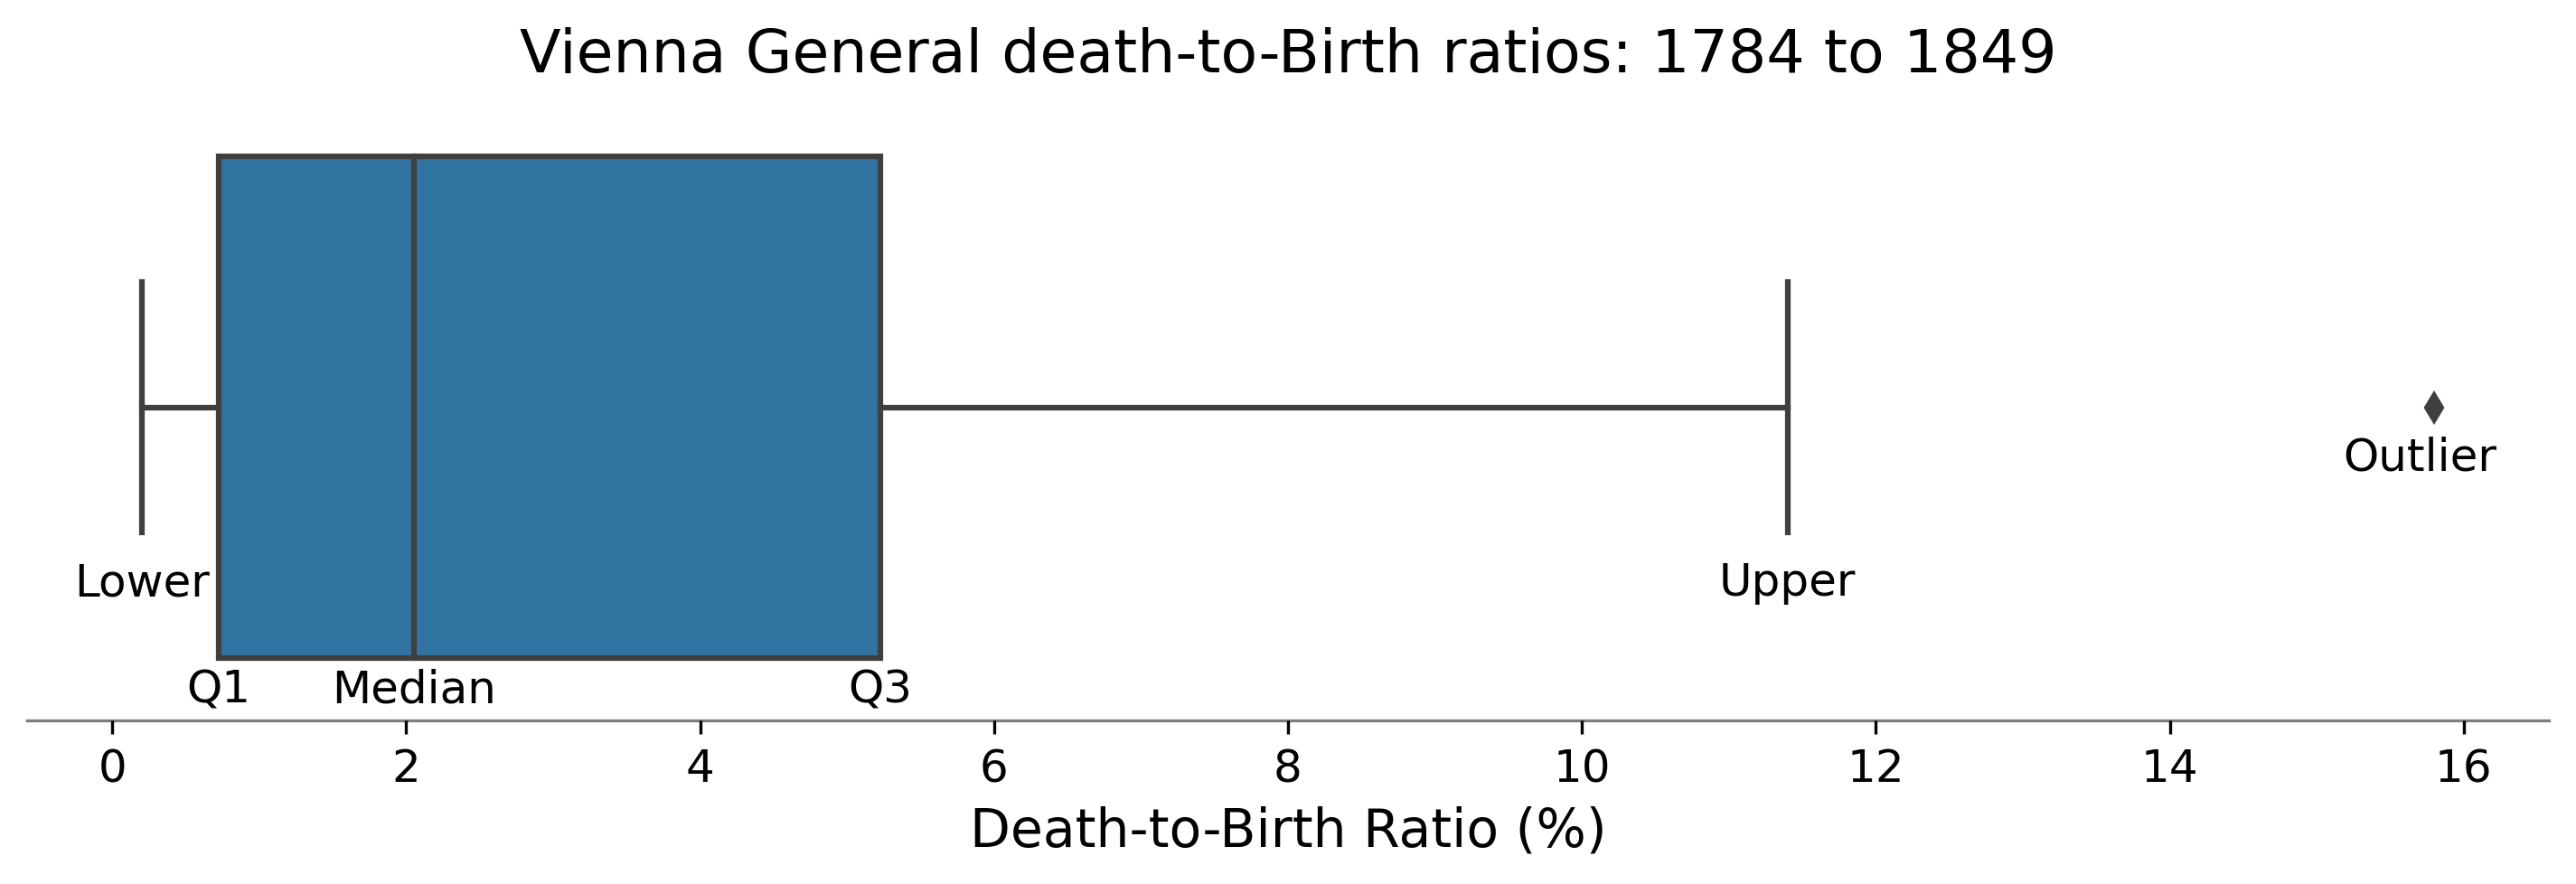

In [28]:
# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,3), dpi=300)

# Create box plot using seaborn (sns.boxplot)
sns.boxplot(data=vg_df, 
            x='Death-to-Birth Ratio', 
            y='Hospital')

# Add title
ax.set_title('Vienna General death-to-Birth ratios: 1784 to 1849', fontsize=16)

# Define annotation details (text, x-coordinates)
annotations = [
    ('Lower', (0.2,0), (0.2,0.3)),
    ('Q1', (0.725,0), (0.725,0.47)),
    ('Median', (2.05,0),(2.05,0.47)),
    ('Q3', (5.225,0), (5.225,0.47)),
    ('Upper', (11.4,0), (11.4,0.3)),
    ('Outlier', (15.7,0), (15.7,0.1))
]

# Add annotations
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext, ha='center', fontsize=12)

# Despine
sns.despine(left=True)
ax.spines['bottom'].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('')
# Specify xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)
# Remove yticks
ax.set_yticks([])
# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# Show plot
plt.show()

## Box and whisker of Dublin ratios

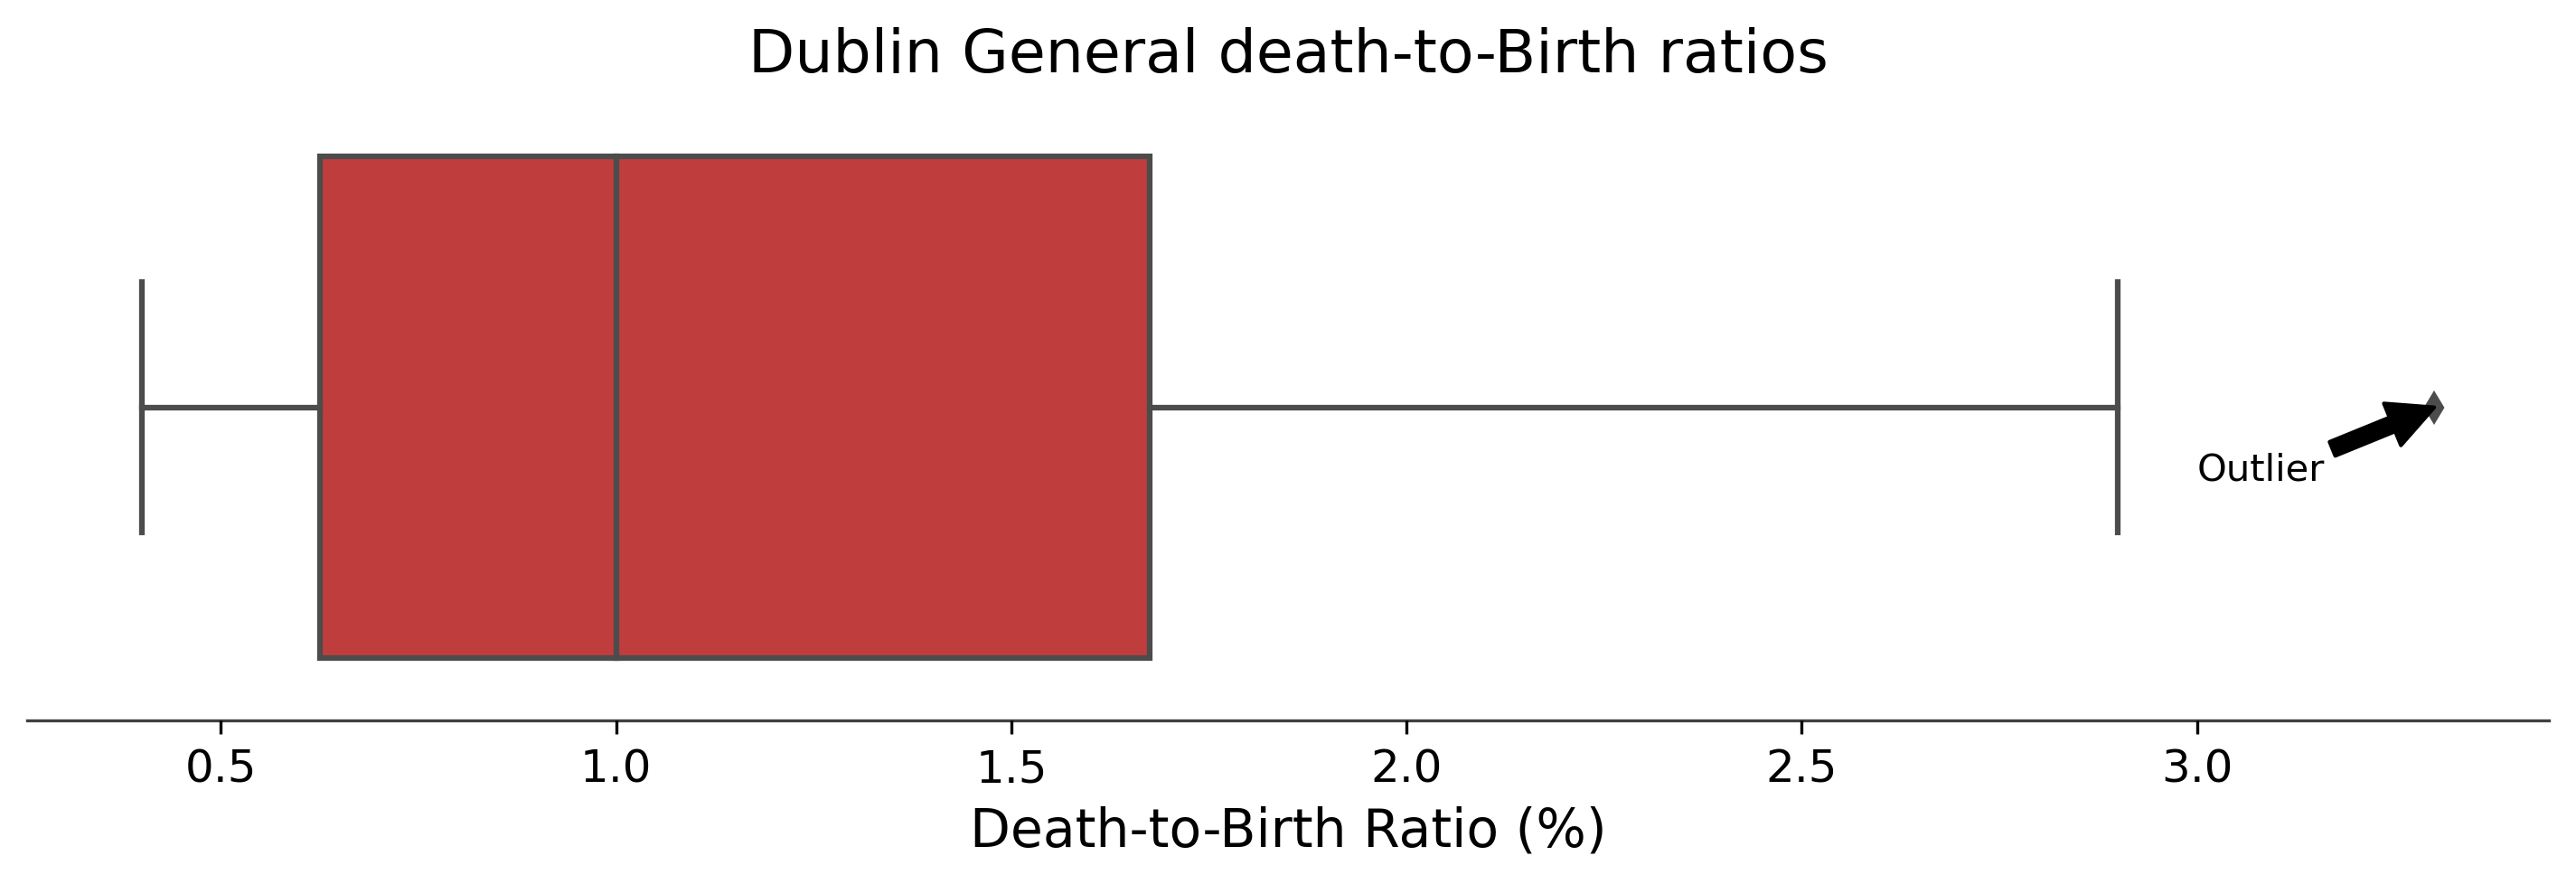

In [23]:
# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,3), dpi=300)

# Create box plot using seaborn (sns.boxplot)
sns.boxplot(data=dg_df, 
            x='Death-to-Birth Ratio', 
            y='Hospital', 
            color='tab:red')

# Annotate outlier
plt.annotate('Outlier', xy=(3.3,0),
            xytext=(3,0.1),
            arrowprops=dict(facecolor='black'), va='center')

# Set title
ax.set_title('Dublin General death-to-Birth ratios', fontsize=16)

# Despine
sns.despine()
ax.spines['bottom'].set_alpha(0.75)

# Remove ylabel
ax.set_ylabel('')
# Specify xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)
# Remove yticks
ax.set_yticks([])
# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# Show plot
plt.show()

## Fig 12.4: Box plot comparing the hospitals

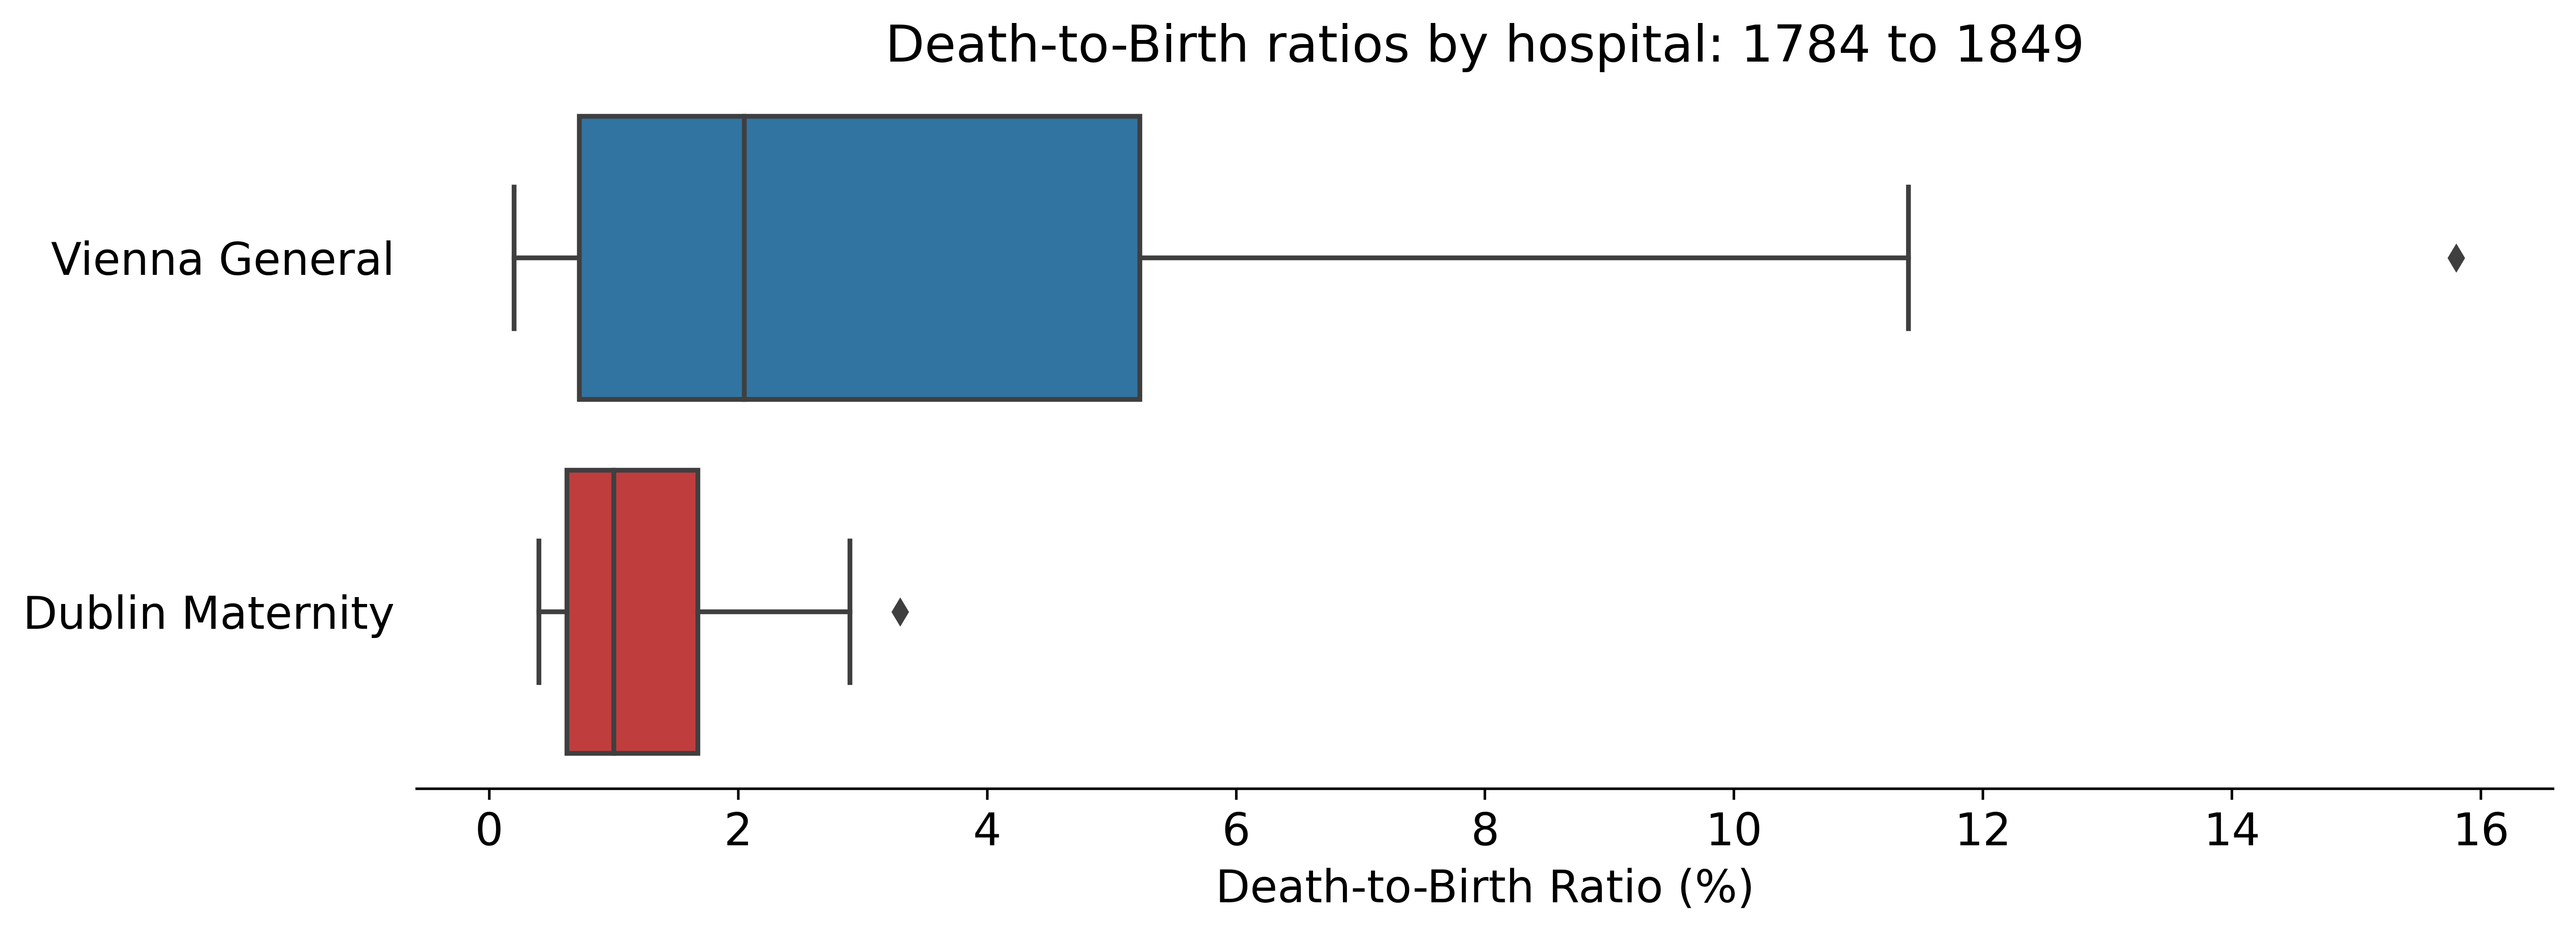

In [30]:
# Specify hospital order
hospital_order = ['Vienna General Hospital', 'Dublin Maternity Hospital']

# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Create box plot 
sns.boxplot(data=df, 
            x='Death-to-Birth Ratio', 
            y='Hospital', 
            palette=['tab:blue','tab:red'],
            order=hospital_order)

# Set custom labels for the y-ticks
ax.set_yticklabels(['Vienna General', 'Dublin Maternity'])

# Specify the plot title
ax.set_title('Death-to-Birth ratios by hospital: 1784 to 1849', fontsize=16)

# Despine
sns.despine()
ax.spines[['top','right','left']].set_visible(False)

# Remove the ylabel
ax.set_ylabel('')
# Specify the xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)

# Remove ticks but leave labels
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)

# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

# Show Plot
plt.show()

## Fig 12.4: Box and whisker with outliers labeled

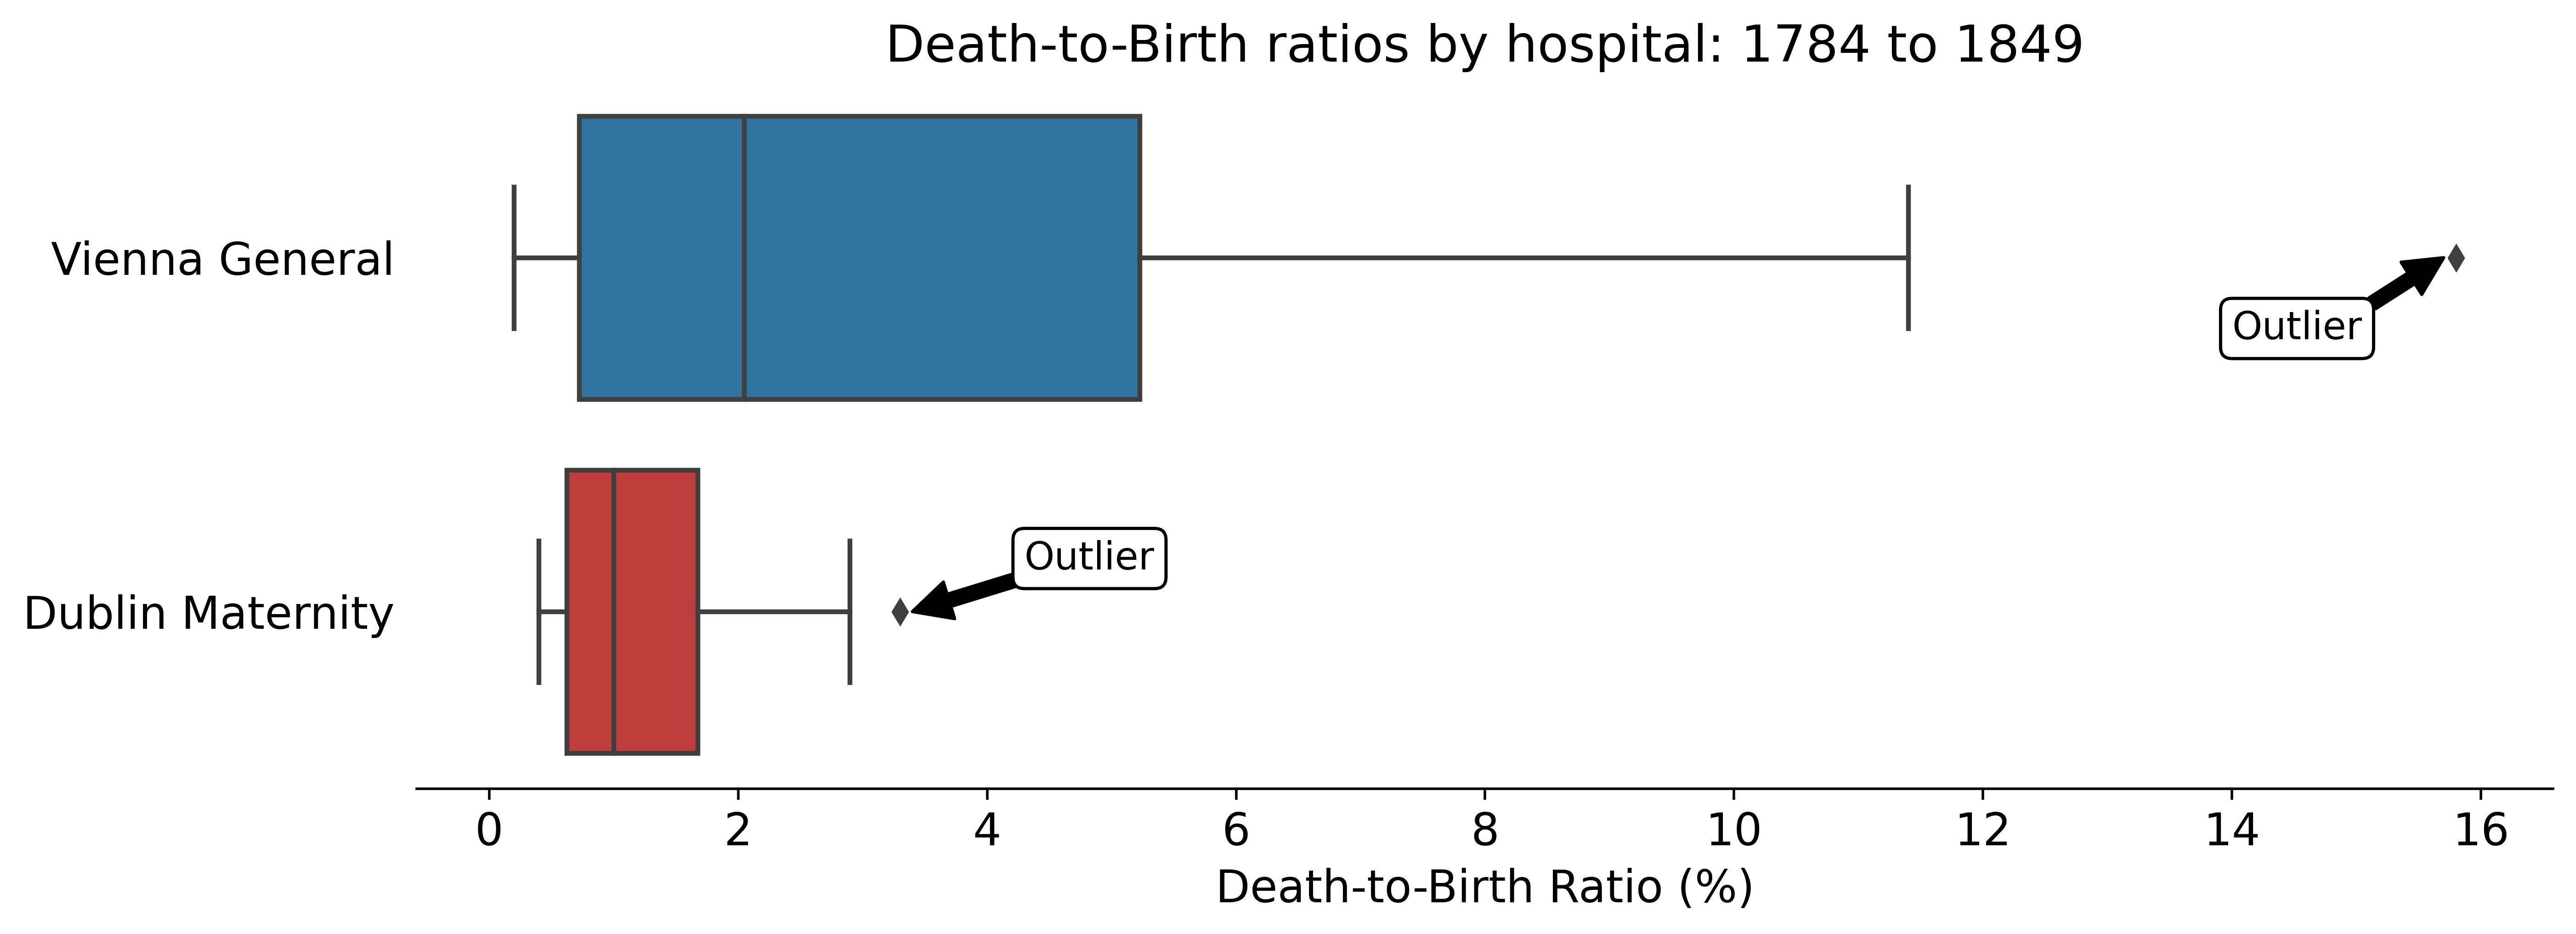

In [31]:
# Specify hospital order
hospital_order = ['Vienna General Hospital', 'Dublin Maternity Hospital']

# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Create box plot 
sns.boxplot(data=df, 
            x='Death-to-Birth Ratio', 
            y='Hospital', 
            palette=['tab:blue','tab:red'],
            order=hospital_order)

# Set custom labels for the y-ticks
ax.set_yticklabels(['Vienna General', 'Dublin Maternity'])

# Specify the plot title
ax.set_title('Death-to-Birth ratios by hospital: 1784 to 1849', fontsize=16)

# Despine
sns.despine()
ax.spines[['top','right','left']].set_visible(False)

# Remove the ylabel
ax.set_ylabel('')
# Specify the xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)

# Remove ticks but leave labels
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)

# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

# Annotations
plt.annotate('Outlier', xy=(15.7,0),
            xytext=(14,0.2), fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
            arrowprops=dict(facecolor='black'), va='center')

plt.annotate('Outlier', xy=(3.4,1),
            xytext=(4.3,0.85), fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),
            arrowprops=dict(facecolor='black'), va='center')

# Show Plot
plt.show()